# MOBILE PRICE PREDICTION DATASET
## Importing Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Loading Data
__Note__ Already cleaned data.

In [2]:
mobile_price = pd.read_csv("MobilePricePrediction.csv")
mobile_price.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [3]:
mobile_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


In [4]:
mobile_price.describe()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,4.112639,5.941760,64.390335,5.620660,47.821561,8.868649,3278.859975,14269.167286
std,0.367830,2.056359,53.868626,3.957409,11.155916,4.547254,937.628801,23092.739983
min,2.800000,0.000000,2.000000,2.000000,5.000000,0.000000,1020.000000,479.000000
25%,3.900000,6.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,984.000000
50%,4.100000,6.000000,32.000000,4.770000,48.000000,8.000000,3000.000000,1699.000000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,12.000000,3800.000000,18994.500000
max,4.800000,12.000000,256.000000,44.000000,64.000000,23.000000,6000.000000,153000.000000


In [5]:
mobile_price.corr()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
Ratings,1.000000,0.121207,0.424841,0.079125,-0.108266,-0.082678,0.448317,0.570777
RAM,0.121207,1.000000,0.332631,0.008619,0.173748,0.195685,0.032596,0.298383
ROM,0.424841,0.332631,1.000000,0.106085,-0.067326,-0.044190,0.412475,0.474928
Mobile_Size,0.079125,0.008619,0.106085,1.000000,-0.053856,-0.020676,0.131125,0.084689
Primary_Cam,-0.108266,0.173748,-0.067326,-0.053856,1.000000,0.121800,-0.059803,-0.223997
Selfi_Cam,-0.082678,0.195685,-0.044190,-0.020676,0.121800,1.000000,-0.092986,0.015791
Battery_Power,0.448317,0.032596,0.412475,0.131125,-0.059803,-0.092986,1.000000,0.369221
Price,0.570777,0.298383,0.474928,0.084689,-0.223997,0.015791,0.369221,1.000000


# Exploratory Data Analysis
## Analysing data
    - Finding Outliers.
    - Finding correlations.
    - Features.

In [26]:
# Separating Input features from Target feature(Price)
features = ["Ratings", "RAM", "ROM", "Mobile_Size", "Primary_Cam", "Selfi_Cam", "Battery_Power"]
X = mobile_price[features]
print(f"FEATURE VARIABLES:\n{X.head()}")

target = ["Price"]
y = mobile_price[target]
print(f"TARGET VARIABLES:\n{y.head()}")

FEATURE VARIABLES:
   Ratings  RAM    ROM  Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power
0      4.3  4.0  128.0         6.00           48       13.0           4000
1      3.4  6.0   64.0         4.50           48       12.0           4000
2      4.3  4.0    4.0         4.50           64       16.0           4000
3      4.4  6.0   64.0         6.40           48       15.0           3800
4      4.5  6.0  128.0         6.18           35       15.0           3800
TARGET VARIABLES:
   Price
0  24999
1  15999
2  15000
3  18999
4  18999


Text(0, 0.5, 'PRICE')

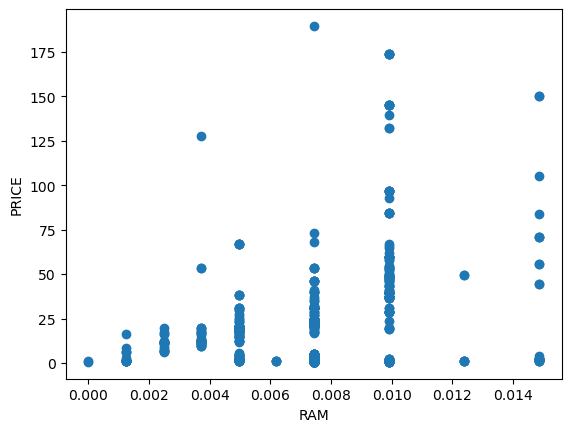

In [27]:
# Rescaling Data for better visualization
plt.scatter(X["RAM"]/len(y), y/len(y))
plt.xlabel("RAM")
plt.ylabel("PRICE")

# Splitting Data into Training and Testing 

In [28]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)
# Defining model
model = LinearRegression()

# creating model
model.fit(train_X, train_y)


LinearRegression()

In [29]:
# getting the intercept of model
c = model.intercept_
c

array([-106073.1387867])

In [30]:
# getting the coefficient of model
m = model.coef_
m

array([[ 2.74375487e+04,  2.91625754e+03,  7.69885638e+01,
         2.32404977e+01, -5.29459267e+02,  4.14502440e+02,
         2.28871854e+00]])

In [55]:
test_predictions = model.predict(test_X)
# test_predictions[:8].flatten()

In [51]:
# print the top few validation predictions
print(f"VALIDATION PREDICTIONS:\n{test_predictions[:8].flatten()}")
# print the top few actual prices from validation data
print(f"ACTUAL PRICES:\n{test_y[:8]}")

VALIDATION PREDICTIONS:
[20939.0109207  20630.89211479 13655.65058547 38122.73804702
  3534.76458822 39389.04754184  6577.93195379 40088.3286128 ]
ACTUAL PRICES:
     Price
8    16490
262  12490
117  13744
309  34990
386    705
314  24990
439   7490
768  29499


In [58]:
# Checking mean absolute error for validation prediction
validation_mae = mean_absolute_error(test_y, test_predictions)
print(f"LinearR MEAN ABSOLUTE ERROR: {validation_mae}")

LinearR MEAN ABSOLUTE ERROR: 9794.902081153177


In [60]:
model.score(test_X, test_y)

0.42993680240321486

In [63]:
r2_score(test_y,test_predictions)

0.42993680240321486